In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_formats = ['svg']
sns.set(style="white", context='poster')
import math

In [102]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
import seaborn_figure_settings

In [104]:
import os
save_dpath = os.path.join('../notebooks/figures/', 'biogeo')
os.makedirs(save_dpath,exist_ok=True)

In [105]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [106]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [107]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [108]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [109]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [110]:
dpath = '../results/rerun_sensitivity_init/biogeo/'
fpath_ponly = '../results/rerun_sensitivity_ponly/clean/biogeo_rerun_sensitivity_ponly.csv.gz'

In [111]:
dpath

'../results/rerun_sensitivity_init/biogeo/'

In [112]:
os.listdir(dpath)

['biogeo_rerun_het_CP13_init.csv.gz',
 'biogeo_rerun_het_BP05_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC2500_init.csv.gz',
 'biogeo_rerun_het_DOC2500_init.csv.gz',
 'biogeo_rerun_het_DIN800_init.csv.gz',
 'biogeo_rerun_het_BP14_init.csv.gz',
 'biogeo_rerun_het_DOC160_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC160_init.csv.gz']

In [113]:
fnames = [
 'biogeo_rerun_het_DIN800DOC2500_init.csv.gz',
 'biogeo_rerun_het_DOC2500_init.csv.gz',
 'biogeo_rerun_het_DIN800_init.csv.gz',
 'biogeo_rerun_het_DOC160_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC160_init.csv.gz']
def _readvfile(fname):
    category = fname.replace(dpath,'').replace('biogeo_rerun_het_','').replace('_init.csv.gz','')
    print (fname, category)
    df = pd.read_csv(fname)
    df['Category'] = category
    return df
comb_df = pd.concat([_readvfile(os.path.join(dpath,f)) for f in fnames], ignore_index=True)


../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800DOC2500_init.csv.gz DIN800DOC2500
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DOC2500_init.csv.gz DOC2500
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800_init.csv.gz DIN800
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DOC160_init.csv.gz DOC160
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800DOC160_init.csv.gz DIN800DOC160


In [114]:
orig_dpath = '../results/final/het'
orig_comb_df = pd.read_csv(os.path.join(orig_dpath, 'integrated_last_core_models_versatile_het.csv.gz'))
orig_comb_df['Category'] = 'Original'

In [115]:
comb_df = pd.concat([comb_df, orig_comb_df], ignore_index=True).copy()

In [130]:
ponly_df = pd.read_csv(fpath_ponly)
ponly_df.head()

Bp Final  Np Final  Cp Final   DON Final  RDON Final  DIN Final  \
0  1.600530  0.334896  5.821358  612.336893  189.611174   0.009364   
1  0.361692  0.089151  0.690842  168.027087  635.405893   0.009034   
2  1.462192  0.116861  4.788415  190.822231  611.486075   0.005499   
3  1.316971  0.357121  4.121376  686.413645  115.760807   0.044313   
4  0.310921  0.064292  0.760886  117.315371  686.201448   0.000825   

     DOC Final   RDOC Final    DIC Final  ROS Final  ...  \
0  4733.685551  1143.421388  2142.351206        0.2  ...   
1  1238.937687  3313.848383  2219.333311        0.2  ...   
2  1646.095243  3860.683585  2207.806046        0.2  ...   
3  5770.460137   780.071305  2141.098618        0.2  ...   
4   918.002048  3588.813294  2224.500078        0.2  ...   

   ROSproductionp Integrated  ROSlossp Integrated  DON2DIN Integrated  \
0                        0.0                  0.0          149.110450   
1                        0.0                  0.0           41.860654   
2                        0.0                  0.0           47.560122   
3                        0.0                  0.0          149.157960   
4                        0.0                  0.0           30.618725   

   additionalLossRatep Integrated  deathC_DOCp Integrated  \
0                             0.0             4525.347401   
1                             0.0             1054.058014   
2                             0.0             1484.380044   
3                             0.0             5626.667258   
4                             0.0              758.358249   

   deathN_DONp Integrated           PP  Total N uptake  PP / total fixed C  \
0              740.533367  7012.271902      904.744100            1.189825   
1              203.579226  5003.948473      798.195480            1.098351   
2              236.522226  8468.649990      774.428339            1.533827   
3              843.283484  7300.551422      966.417130            1.112316   
4              142.332636  5383.933949      833.014369            1.193873   

    N reuse  
0  8.783923  
1  7.749471  
2  7.518722  
3  9.382691  
4  8.087518  

[5 rows x 74 columns]

In [131]:
ponly_df[['id', 'media', 'which', 'model', 'hash']] =     ponly_df.run_id.str.rsplit('_', n=4, expand=True)


In [132]:
ponly_df['Category'] = ponly_df['id'].str.split('_', expand=True)[2]


In [125]:
media_order = ['Original',
               'DOC160', 'DOC2500', 'DIN800DOC160',  'DIN800', 'DIN800DOC2500',  ]

In [126]:
DEFAULT_DOC = 20
DEFAULT_DIN = 100
docmap ={
    'Original' : DEFAULT_DOC,
    'DOC160' : 160,
    'DOC2500' : 2500, 
    'DIN800DOC160' : 160,  
    'DIN800' : DEFAULT_DOC, 
    'DIN800DOC2500' : 2500,
}
dinmap ={
    'Original' : DEFAULT_DIN,    
    'DOC160' : DEFAULT_DIN,
    'DOC2500' : DEFAULT_DIN, 
    'DIN800DOC160' : 800,  
    'DIN800' : 800, 
    'DIN800DOC2500' :800,
}


In [127]:
comb_df['DOC'] = comb_df['Category'].map(docmap)
comb_df['DIN'] = comb_df['Category'].map(dinmap)

In [133]:
ponly_df['DOC'] = ponly_df['Category'].map(docmap)
ponly_df['DIN'] = ponly_df['Category'].map(dinmap)

In [134]:
ponly_df[['Category', 'DIN', 'DOC']].value_counts()

Category       DIN    DOC   
DIN800         800.0  20.0      163
DIN800DOC160   800.0  160.0     163
DIN800DOC2500  800.0  2500.0    163
DOC160         100.0  160.0     163
DOC2500        100.0  2500.0    163
Original       100.0  20.0      163
Name: count, dtype: int64

In [135]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Bp Final', 'Np Final',
       ...
       'deathC_DOCh Integrated', 'deathN_DONp Integrated',
       'deathN_DONh Integrated', 'PP', 'Total N uptake', 'PP / total fixed C',
       'N reuse', 'Category', 'DOC', 'DIN'],
      dtype='object', length=128)

In [136]:
def _change_col(c):
    suffixes = ('Integrated','Final')
    for suffix in suffixes:
        s = f' {suffix}'
        if c.endswith(s):
            c = c.replace(s, '')
            c= f'{suffix} {c}'
            return c
    return c
comb_df.rename(columns={c:_change_col(c) for c in comb_df.columns}, inplace=True)


In [157]:
ponly_df.rename(columns={c:_change_col(c) for c in ponly_df.columns}, inplace=True)


In [138]:
comb_df['Final Organic C'] = comb_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]', 'Final Bhtotal[C]', ]].sum(axis=1)
comb_df['Integrated N uptake'] = comb_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp', 
                                          'Integrated gross_uptakeINh', 'Integrated gross_uptakeONh',  ]].sum(axis=1)

comb_df['Integrated C Biomassp'] = comb_df['Integrated Bptotal[C]']
comb_df['Integrated C Biomassh'] = comb_df['Integrated Bhtotal[C]']
comb_df['Integrated N Biomassp'] = comb_df['Integrated Bptotal[N]']
comb_df['Integrated N Biomassh'] = comb_df['Integrated Bhtotal[N]']



In [159]:
ponly_df['Final Organic C'] = ponly_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]',  ]].sum(axis=1)
comb_df['Integrated N uptake'] = ponly_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp',   ]].sum(axis=1)

ponly_df['Integrated C Biomassp'] = ponly_df['Integrated Bptotal[C]']
ponly_df['Integrated N Biomassp'] = ponly_df['Integrated Bptotal[N]']



In [139]:
comb_df['Final Het/Pro'] = comb_df['Final Bhtotal[N]'].div(comb_df['Final Bptotal[N]'])

In [140]:
value_cols = [
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',

 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',

 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'
]



In [141]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'   
]:
    comb_df[i] = comb_df[i].div(comb_df.t) 

In [162]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated N Biomassp',
]:
    ponly_df[i] = ponly_df[i].div(ponly_df.t) 

In [142]:
comb_df.rename(columns={c: c.replace('gross_uptake', 'Uptake ') for c in comb_df.columns}, inplace=True)

# BIO GEO chemical

# total PP and total N uptake

# efficiency 
# Total carbon fixation integrated vs final fixed carbon
# New production N vs recycled production


In [154]:
comb_df['N reuse'] = comb_df['Total N uptake'] / (comb_df['DIN'] + INIT_DON)
ponly_df['N reuse'] = ponly_df['Total N uptake'] / (ponly_df['DIN'] + INIT_DON)


In [40]:
comb_df

model Phase                     VPRO  Versatile  \
0       EXOENZYME  init  vpro_11_62_EXOENZYME_C1       True   
1       EXOENZYME  init  vpro_17_89_EXOENZYME_C2      False   
2       EXOENZYME  init  vpro_17_89_EXOENZYME_C2      False   
3       EXOENZYME  init  vpro_19_83_EXOENZYME_C1       True   
4       EXOENZYME  init  vpro_23_67_EXOENZYME_C3      False   
...           ...   ...                      ...        ...   
128847        ROS   add    vpro_19_33_ROS_C0_684       True   
128848        ROS   add    vpro_19_33_ROS_C0_912       True   
128849        ROS   add    vpro_19_33_ROS_C0_932       True   
128850        ROS   add    vpro_19_33_ROS_C0_979       True   
128851        ROS   add    vpro_19_33_ROS_C0_980       True   

                                                   run_id   y_pred    Sample  \
0       rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...   Strong  5x5_21A0   
1       rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...  Neutral       1B0   
2       rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...  Neutral       1B0   
3       rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...   Strong  5x5_21B0   
4       rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...    Other       NaN   
...                                                   ...      ...       ...   
128847  monteadd_ROS_9_monte_vpro_19_33_ROS_C0_684_23_...   Strong  5x5_21B0   
128848  monteadd_ROS_9_monte_vpro_19_33_ROS_C0_912_33_...   Strong  5x5_21B0   
128849  monteadd_ROS_9_monte_vpro_19_33_ROS_C0_932_42_...   Strong  5x5_21A0   
128850  monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...     Weak      10C0   
128851  monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...   Strong  5x5_21B0   

        max_prob  Final Bp  Final Np  ...       Category   DOC  DIN  \
0       0.987367  1.258000  0.249169  ...  DIN800DOC2500  2500  800   
1       0.986738  0.001712  0.000354  ...  DIN800DOC2500  2500  800   
2       0.986941  0.004032  0.000833  ...  DIN800DOC2500  2500  800   
3       0.990800  0.611705  0.165103  ...  DIN800DOC2500  2500  800   
4       0.980518  0.050188  0.004206  ...  DIN800DOC2500  2500  800   
...          ...       ...       ...  ...            ...   ...  ...   
128847  0.942628  2.141059  0.031417  ...       Original    20  100   
128848  0.968076  2.863904  0.043200  ...       Original    20  100   
128849  0.980187  3.947607  0.030296  ...       Original    20  100   
128850  0.407143  0.380849  0.012095  ...       Original    20  100   
128851  0.978074  3.015836  0.039913  ...       Original    20  100   

        Final Organic C  Integrated N uptake  Integrated C Biomassp  \
0           5131.149401          3746.761410             210.577708   
1           4639.643118          2151.419436              42.494817   
2           5280.615063          2285.515855              50.675483   
3           4637.443831          3745.236247             130.513496   
4           3524.285992           983.455708             167.131714   
...                 ...                  ...                    ...   
128847       719.093599           273.500284             136.863135   
128848       349.848632           298.910226             145.113712   
128849       486.530341           407.738040             207.718633   
128850       556.215166           349.485154              40.293504   
128851       539.333213           296.576033             160.786027   

        Integrated C Biomassh  Integrated N Biomassp  Integrated N Biomassh  \
0                  634.266344              24.987192             159.033186   
1                   70.240214               6.087638              15.616125   
2                   79.030711               7.317990              14.364927   
3                  551.586253              17.341252             142.695173   
4                  223.557035              19.540362              66.096724   
...                       ...                    ...                    ...   
128847              18.861133      

In [156]:
comb_df['Carbon Use Efficiency'] = comb_df['Final Organic C'].div(comb_df['Integrated Uptake ICp'] )


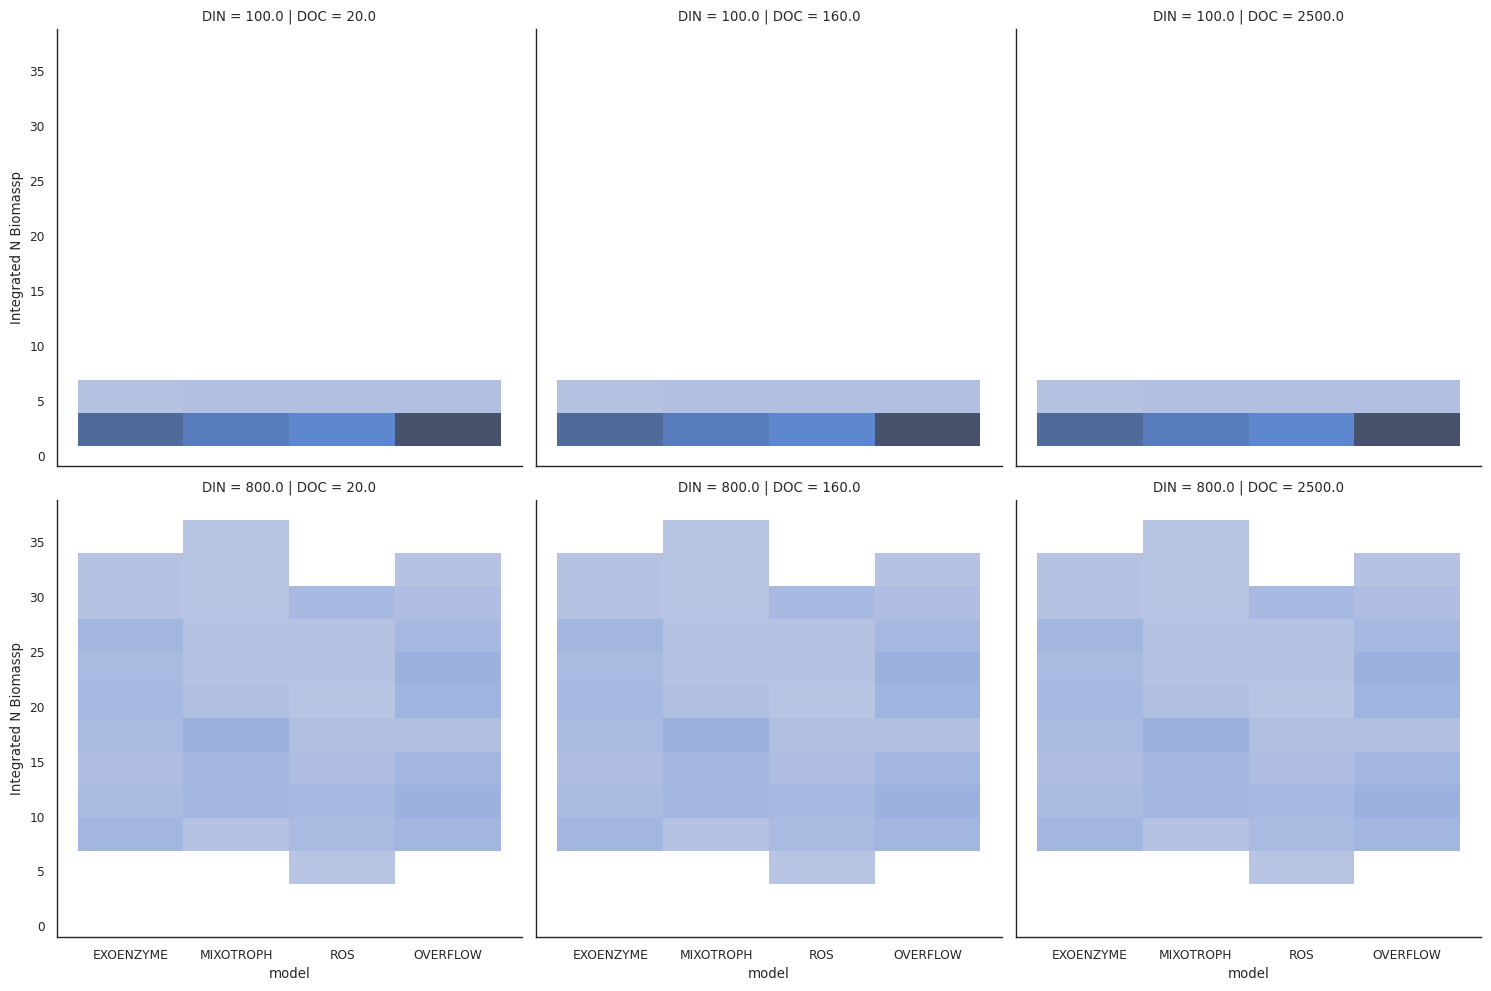

In [166]:
sns.displot(
    data=ponly_df,
    #col='model', col_order=morder, 
    col='DOC', row='DIN',
    y='Integrated N Biomassp', x='model',
)


In [171]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

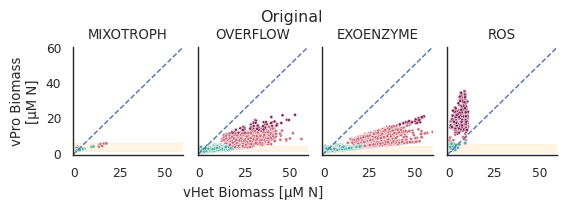

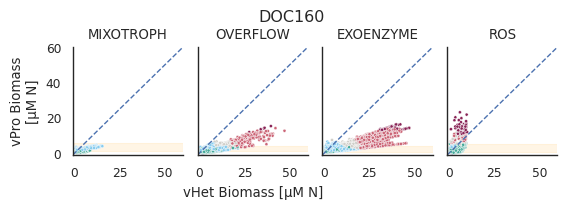

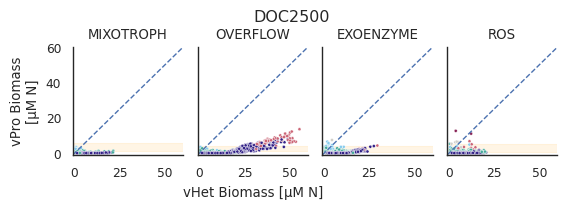

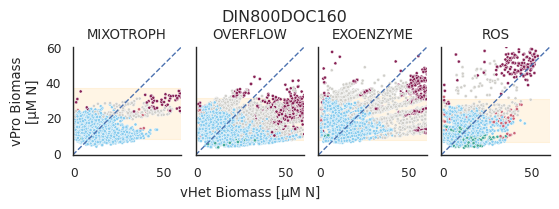

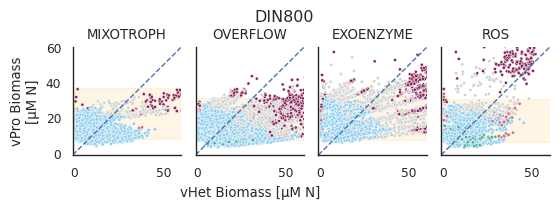

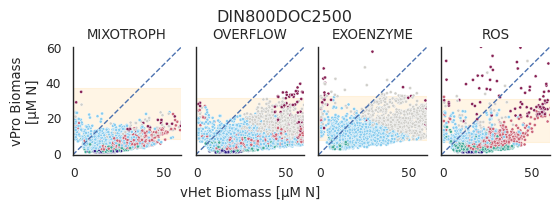

In [188]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[#~comb_df.y_pred.isin(['Axenic', 'Other']) &
        comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated N Biomassp', x='Integrated N Biomassh',
        hue='y_pred', hue_order=list(reversed(gorder)), palette=list(reversed(gpalette)),
        col='model', col_order=morder, s=5, lw=0.3,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
        ponly_values = ponly_df.loc[ponly_df.Category.isin([cat]) & ponly_df.model.isin([col_val]), 'Integrated N Biomassp']
        ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
    
    g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass [µM N]', 
          xlim=(-1,60), 
          ylim=(-1,60), 
         )
    g.axes_dict['MIXOTROPH'].set(xlabel='')
    g.axes_dict['EXOENZYME'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


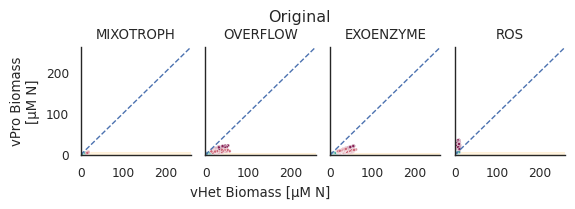

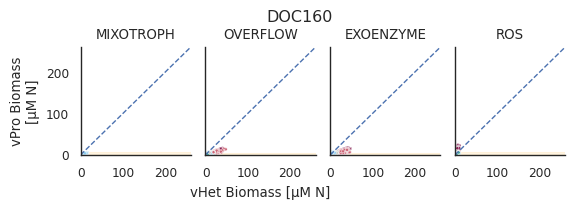

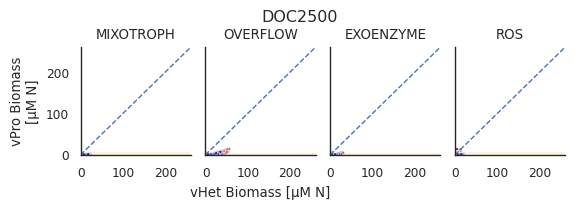

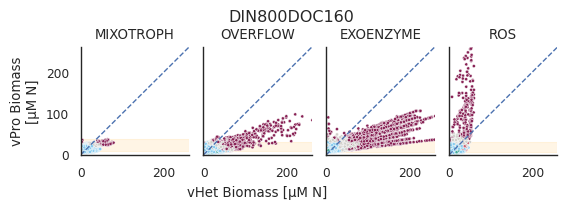

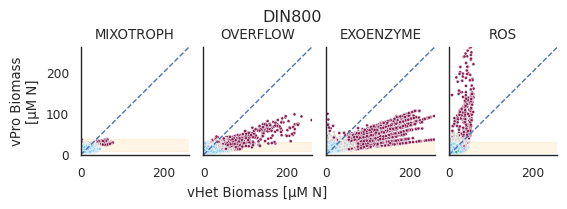

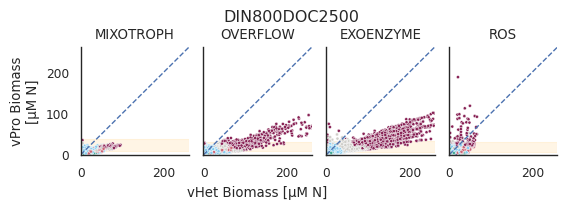

In [187]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[#~comb_df.y_pred.isin(['Axenic', 'Other']) &
        comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated N Biomassp', x='Integrated N Biomassh',
        hue='y_pred', hue_order=list(reversed(gorder)), palette=list(reversed(gpalette)),
        col='model', col_order=morder, s=5, lw=0.3,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
        ponly_values = ponly_df.loc[ponly_df.Category.isin([cat]) & ponly_df.model.isin([col_val]), 'Integrated N Biomassp']
        ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
    
    g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass [µM N]', 
          xlim=(-1,260), 
          ylim=(-1,260), 
         )
    g.axes_dict['MIXOTROPH'].set(xlabel='')
    g.axes_dict['EXOENZYME'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


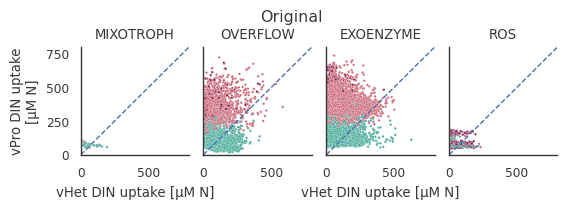

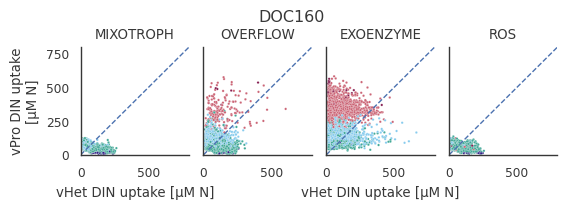

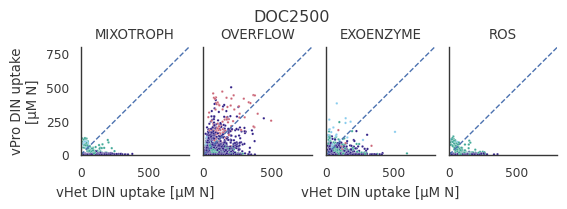

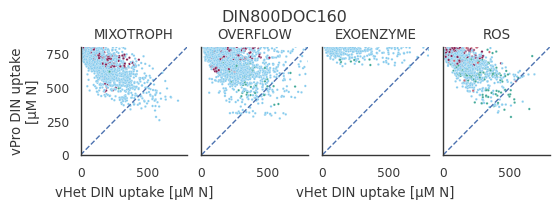

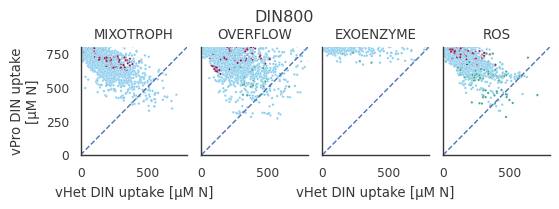

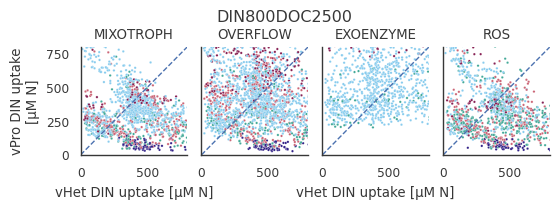

In [92]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated Uptake INp', x='Integrated Uptake INh',
        hue='y_pred', hue_order=gorder, palette=gpalette,
        col='model', col_order=morder, s=3,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro DIN uptake\n[µM N]', xlabel='vHet DIN uptake [µM N]', 
          xlim=(-1,800), 
          ylim=(-1,800), 
         )
    g.axes_dict['MIXOTROPH'].set(xlabel='')
    g.axes_dict['EXOENZYME'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


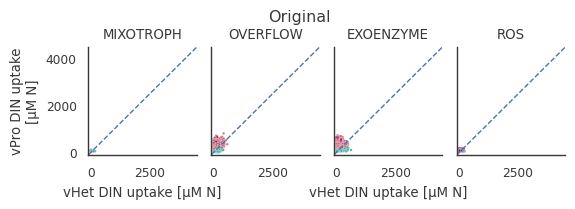

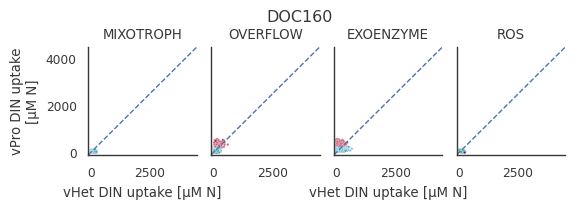

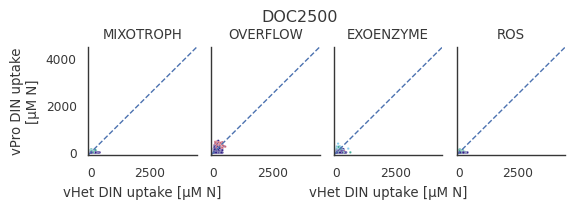

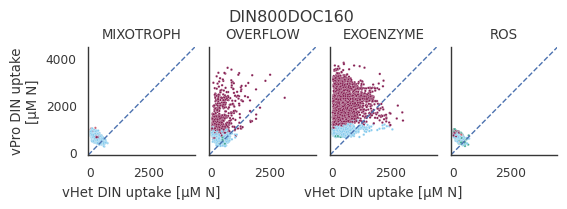

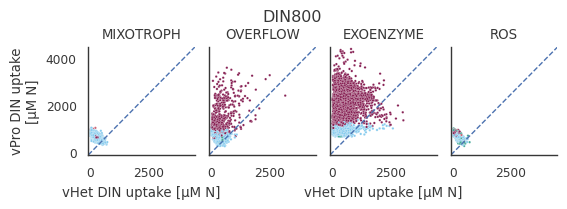

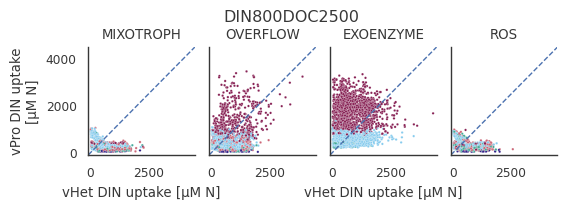

In [93]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated Uptake INp', x='Integrated Uptake INh',
        hue='y_pred', hue_order=gorder, palette=gpalette,
        col='model', col_order=morder, s=3,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro DIN uptake\n[µM N]', xlabel='vHet DIN uptake [µM N]', 
          xlim=(-100,4500), 
          ylim=(-100,4500), 
         )
    g.axes_dict['MIXOTROPH'].set(xlabel='')
    g.axes_dict['EXOENZYME'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


In [48]:
from scipy.stats import pearsonr, spearmanr
for cat in media_order:
    for m in morder:
        
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & #comb_df.Versatile & 
        comb_df.model.isin([m]) 
            &comb_df.Category.isin([cat])]
        i = pearsonr(data['Integrated C Biomassp'],data['Integrated C Biomassh'])
        print(cat, m, data.shape[0], np.round(i[0], 2), i[1])


Original MIXOTROPH 68 0.96 6.487754169614949e-37
Original OVERFLOW 11963 0.86 0.0
Original EXOENZYME 8847 0.77 0.0
Original ROS 605 0.45 3.8613207137814998e-31
DOC160 MIXOTROPH 2367 0.65 2.5366657617701456e-284
DOC160 OVERFLOW 4715 0.78 0.0
DOC160 EXOENZYME 5373 0.79 0.0
DOC160 ROS 2037 0.63 9.334895086175107e-223
DOC2500 MIXOTROPH 1975 -0.17 9.34489684905387e-15
DOC2500 OVERFLOW 2990 0.65 0.0
DOC2500 EXOENZYME 2431 0.11 2.0660310841512242e-08
DOC2500 ROS 1710 -0.04 0.07195432117814521
DIN800DOC160 MIXOTROPH 2089 0.56 1.6258352290293612e-171
DIN800DOC160 OVERFLOW 3383 0.8 0.0
DIN800DOC160 EXOENZYME 4587 0.77 0.0
DIN800DOC160 ROS 1952 0.69 4.0455606794418816e-280
DIN800 MIXOTROPH 2101 0.54 1.4469939475202465e-161
DIN800 OVERFLOW 3370 0.8 0.0
DIN800 EXOENZYME 4651 0.75 0.0
DIN800 ROS 1934 0.69 1.2891778832641387e-278
DIN800DOC2500 MIXOTROPH 1985 0.52 7.804730931462973e-141
DIN800DOC2500 OVERFLOW 3313 0.86 0.0
DIN800DOC2500 EXOENZYME 3222 0.85 0.0
DIN800DOC2500 ROS 1785 0.41 4.95966446202

In [49]:
comb_df['Het/Pro C yield'] = comb_df['Integrated C Biomassh'].div(comb_df['Integrated C Biomassp'])


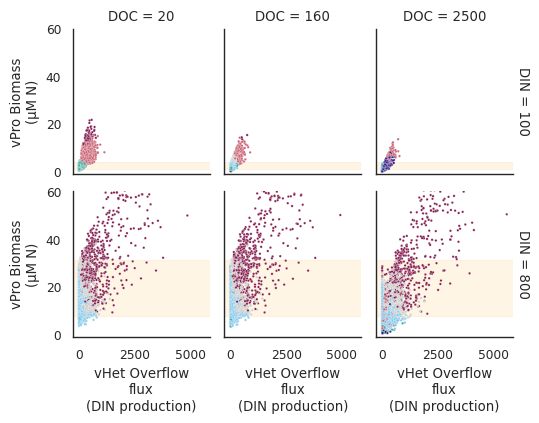

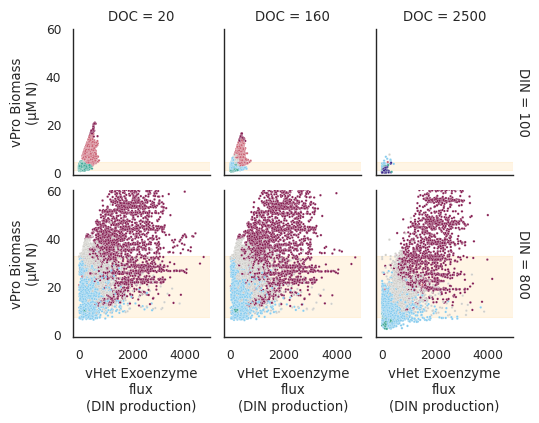

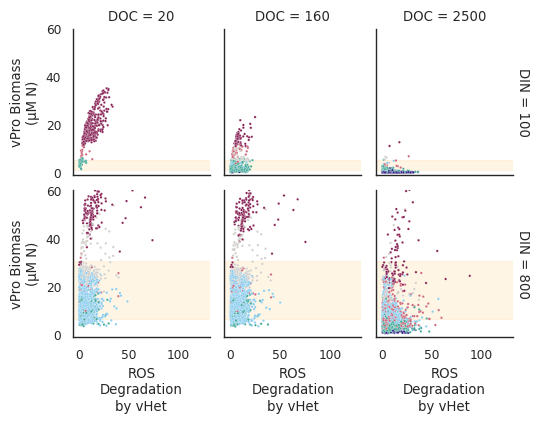

In [189]:
import colorcet 
sns.set_context('paper') #, font_scale=1.3)
#fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(2,5), sharex=False, sharey=True, ) #, facecolor="#F0F0F0")
for i, (m, c,xlabel) in enumerate(zip(['OVERFLOW', 'EXOENZYME', 'ROS', ], 
                [ 'Integrated overflowNh','Integrated DON2DIN_exoh','Integrated ROSlossh', ], 
                [ 'vHet Overflow\nflux\n(DIN production)','vHet Exoenzyme\nflux\n(DIN production)','ROS\nDegradation\nby vHet', ], 
               )):
    g = sns.relplot(
        data=comb_df.loc[#~comb_df.y_pred.isin(['Axenic', 'Other']) & 
        comb_df.Phase.isin(['init', 'extend']) & comb_df.model.isin([m]) #& #comb_df.Versatile
        ],
         x=c, y='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder, palette=gpalette,
        col='DOC', row='DIN',
        s=3,
        legend=False, aspect=0.9, height=2, rasterized=True,
        facet_kws=dict(margin_titles=True)
    )
    #g.set_titles(col_template='{col_name}', row_template)
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    for (row_val, col_val), ax in g.axes_dict.items():
        ponly_values = ponly_df.loc[ponly_df.DOC.isin([col_val]) & ponly_df.DIN.isin([row_val]) & ponly_df.model.isin([m]), 'Integrated N Biomassp']
        ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
    
    g.set(ylabel='vPro Biomass\n(µM N)', xlabel=xlabel, 
      ylim=(-1,60), 
         )
    #if c != 'Integrated overflowNh':
    #    g.set(ylabel='', yticks=[])
    #save_fpath = os.path.join(save_dpath, f'fig_4_main_proc_{m}.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)
        

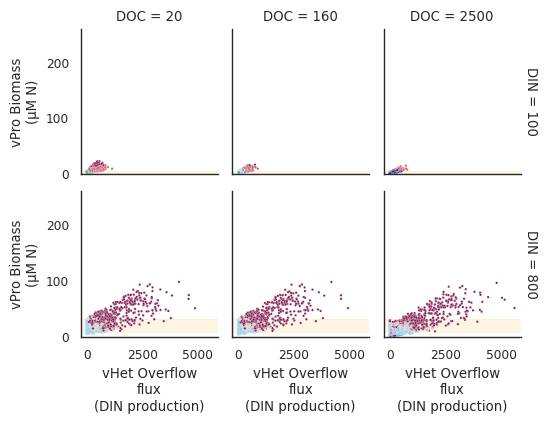

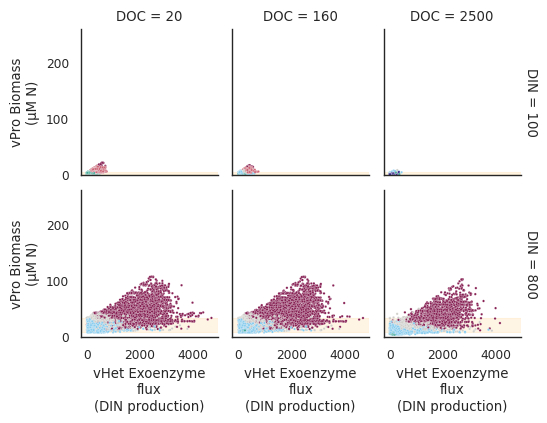

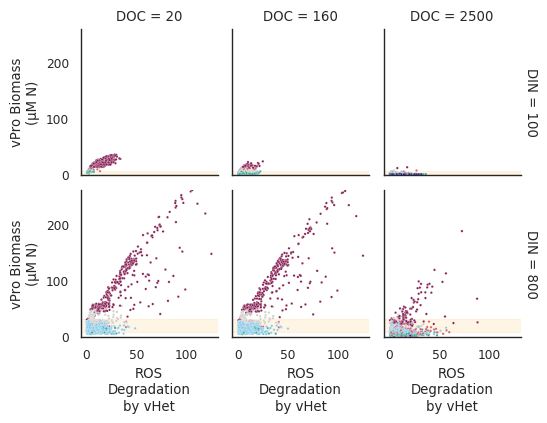

In [190]:
#fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(2,5), sharex=False, sharey=True, ) #, facecolor="#F0F0F0")
for i, (m, c,xlabel) in enumerate(zip(['OVERFLOW', 'EXOENZYME', 'ROS', ], 
                [ 'Integrated overflowNh','Integrated DON2DIN_exoh','Integrated ROSlossh', ], 
                [ 'vHet Overflow\nflux\n(DIN production)','vHet Exoenzyme\nflux\n(DIN production)','ROS\nDegradation\nby vHet', ], 
               )):
    g = sns.relplot(
        data=comb_df.loc[#~comb_df.y_pred.isin(['Axenic', 'Other']) & 
        comb_df.Phase.isin(['init', 'extend']) & comb_df.model.isin([m]) #& #comb_df.Versatile
        ],
         x=c, y='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder, palette=gpalette,
        col='DOC', row='DIN',
        s=3,
        legend=False, aspect=0.9, height=2, rasterized=True,
        facet_kws=dict(margin_titles=True)
    )
    #g.set_titles(col_template='{col_name}', row_template)
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro Biomass\n(µM N)', xlabel=xlabel, 
      ylim=(-1,260), 
         )
    for (row_val, col_val), ax in g.axes_dict.items():
        ponly_values = ponly_df.loc[ponly_df.DOC.isin([col_val]) & ponly_df.DIN.isin([row_val]) & ponly_df.model.isin([m]), 'Integrated N Biomassp']
        ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
    #if c != 'Integrated overflowNh':
    #    g.set(ylabel='', yticks=[])
    #save_fpath = os.path.join(save_dpath, f'fig_4_main_proc_{m}.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)
        

In [52]:
pca_data_cols_full = [
    
 'Final RDON',
 'Final RDOC',
 'Final DON',
 'Final DOC',
 'Total N uptake',
 'N reuse',
 'Final Organic C',
 #'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh',
 'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]

pca_data_cols = [
    
 'Final RDON',
 'Final RDOC',
 'Total N uptake',
 #'N reuse',
 'Final Organic C',
 #'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 #'Integrated N Biomassp',
 #'Integrated N Biomassh',
 #'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]

In [88]:
core_df = comb_df.loc[comb_df.y_pred.isin(gorder)& comb_df.Phase.isin(['init', 'extend']) #& comb_df.Versatile 
& comb_df.model.isin(morder)]


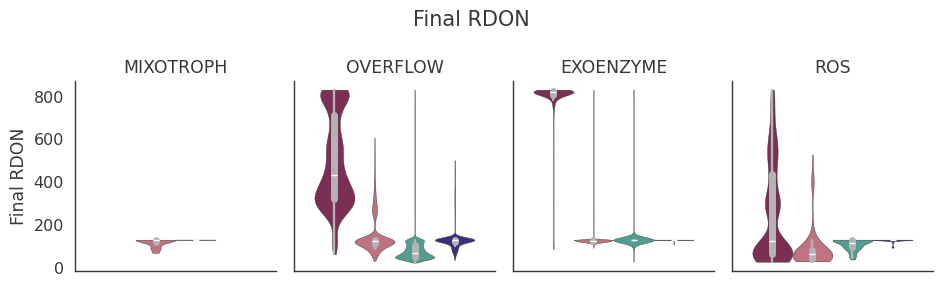

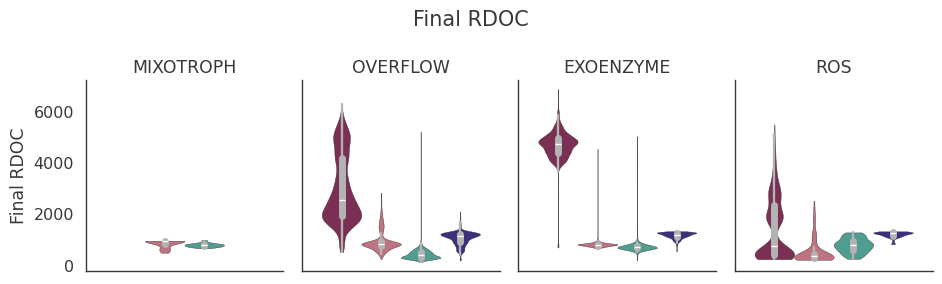

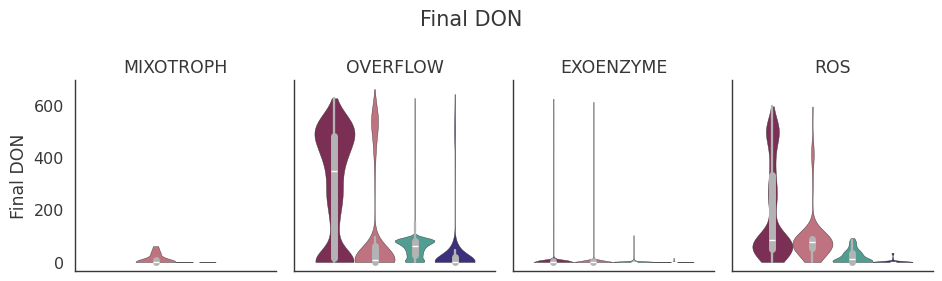

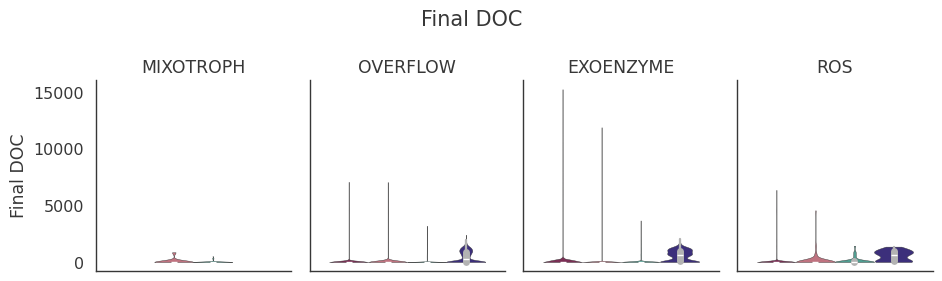

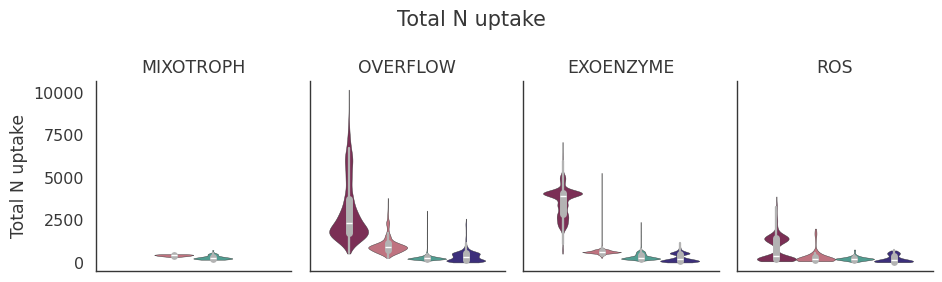

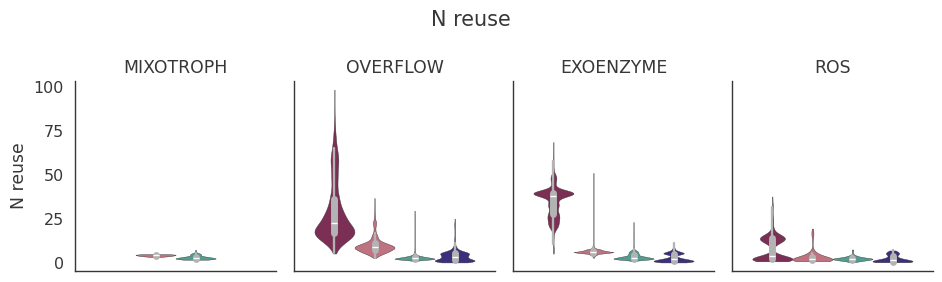

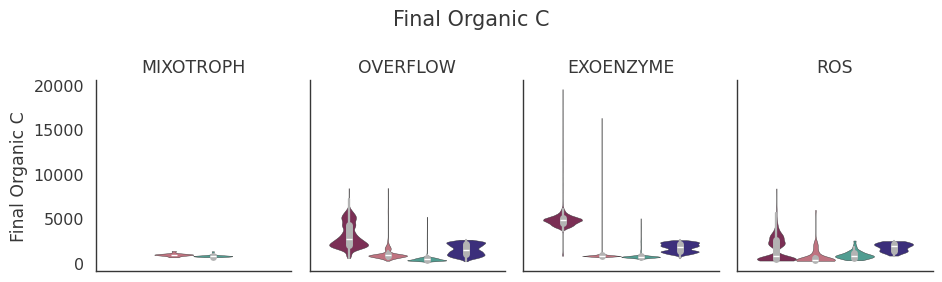

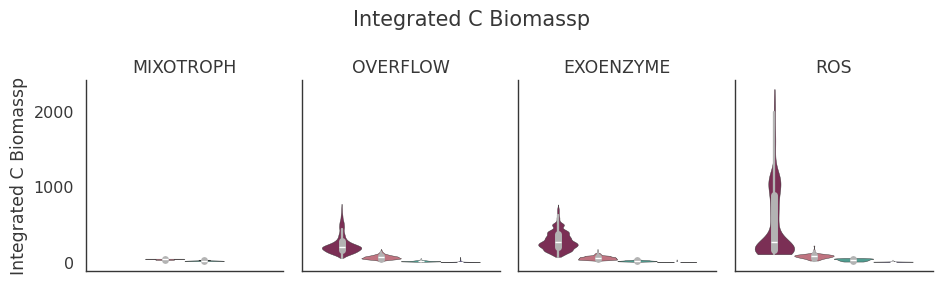

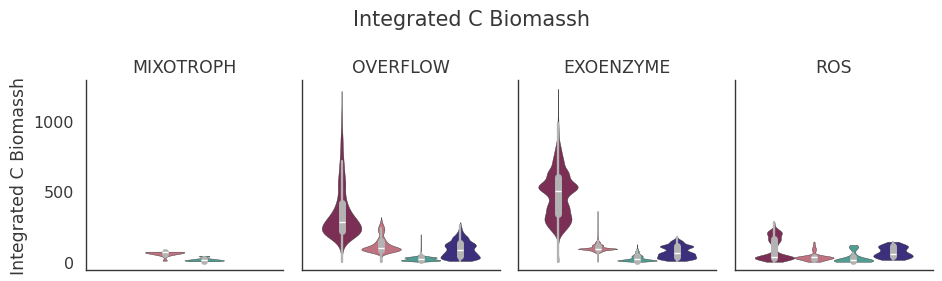

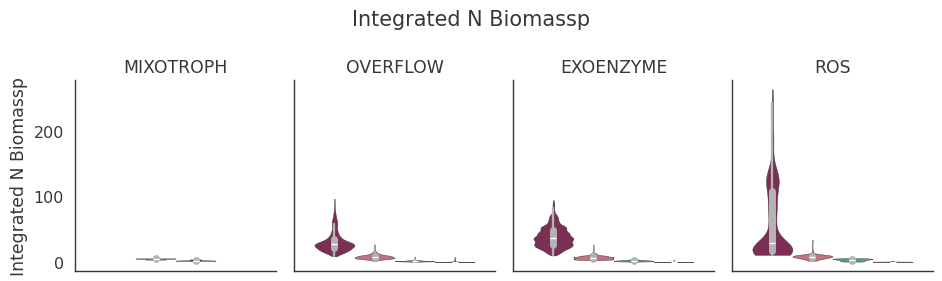

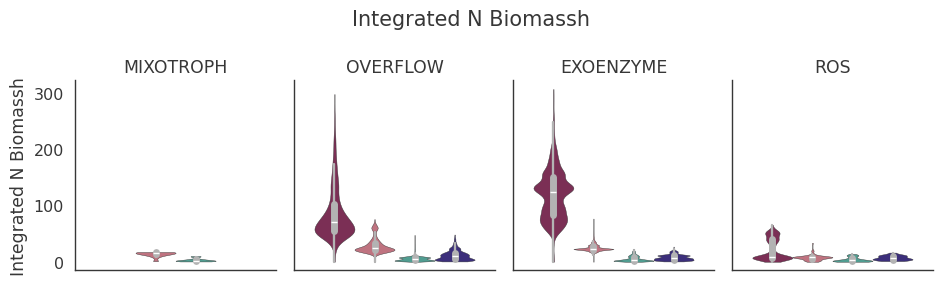

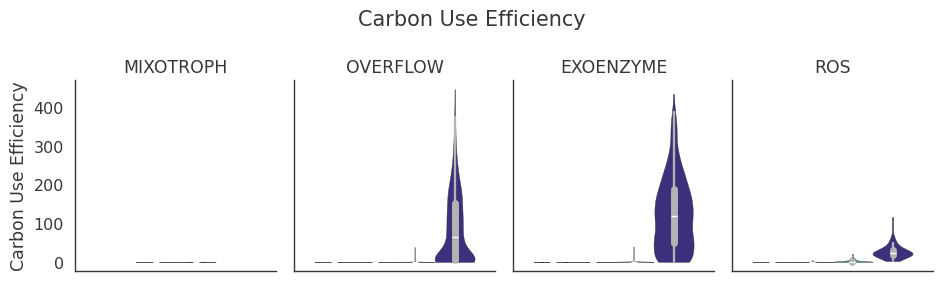

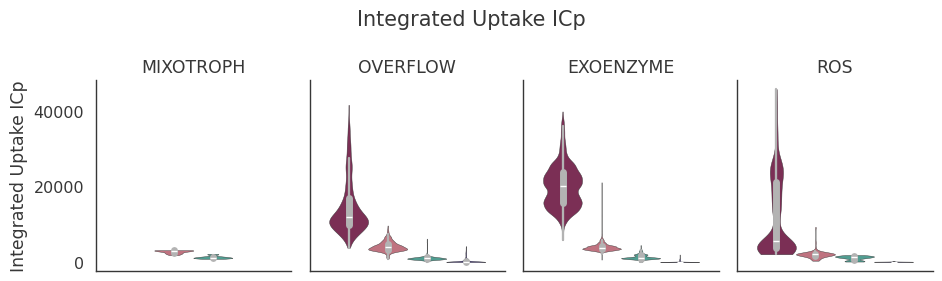

In [54]:
sns.set_context('paper', font_scale=1.3)
for c in pca_data_cols_full:
    g = sns.catplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.8,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    g.set_titles(col_template='{col_name}')
    g.set(xticks=[], xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(c, y=1.1)
    plt.show()

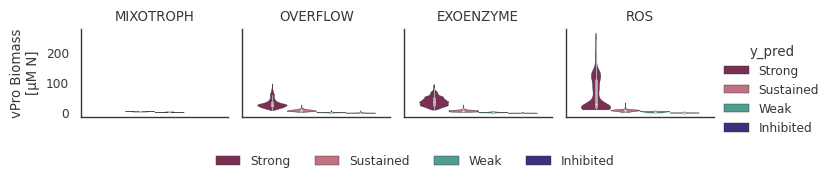

In [55]:
sns.set_context('paper', font_scale=1)
for c in ['Integrated N Biomassp']:
    g = sns.catplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', # dodge=False,order=gorder1,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=1,
        linewidth=0.3, 
        height=1.8,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=2, color=".7", ),
        #legend=False,
    )
    g.set_titles(col_template='{col_name}')
    g.set(xticks=[],
          xlabel='', ylabel='vPro Biomass\n[µM N]')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    #plt.suptitle('vPro Biomass', y=1.1)
    parent_mpl_figure = g.fig
    parent_mpl_figure.legend(loc='lower center', ncols=4, frameon=False)
    plt.show()

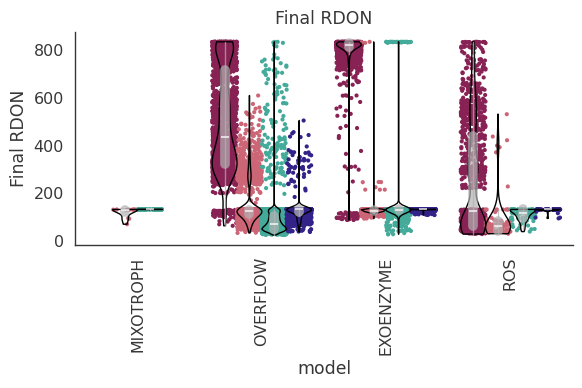

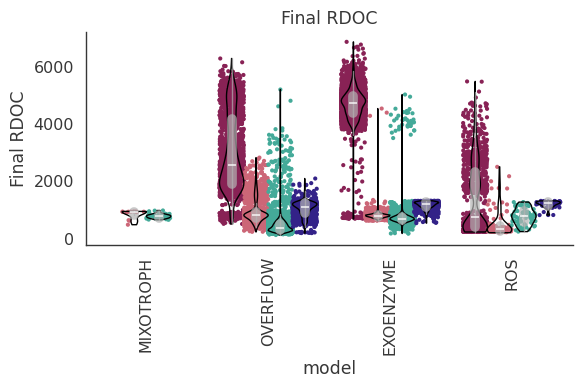

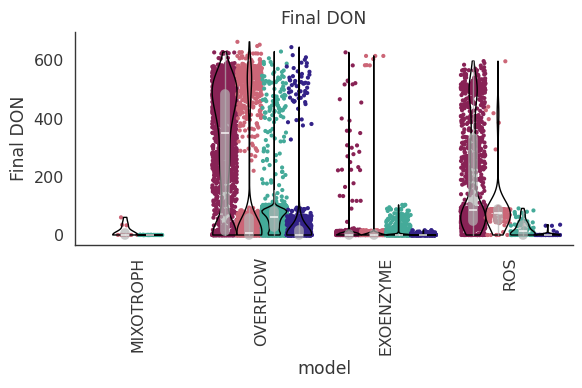

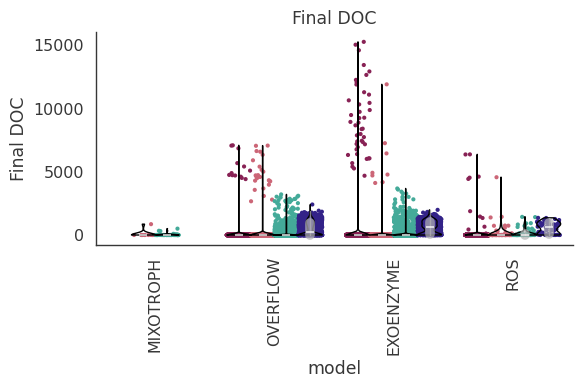

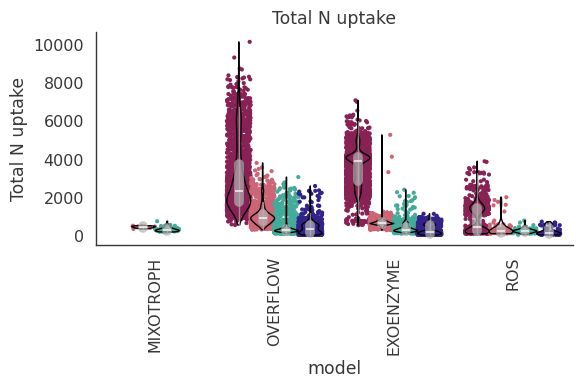

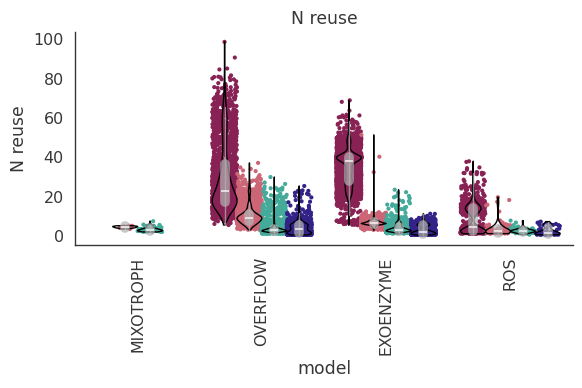

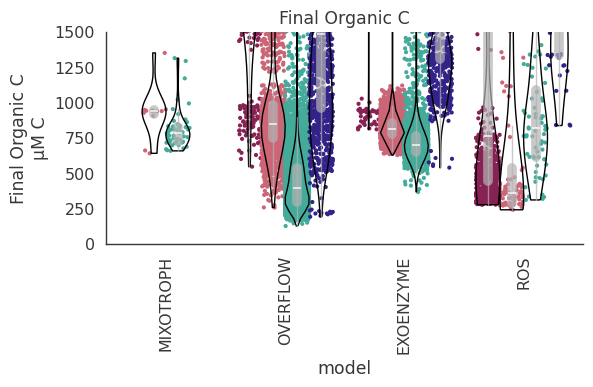

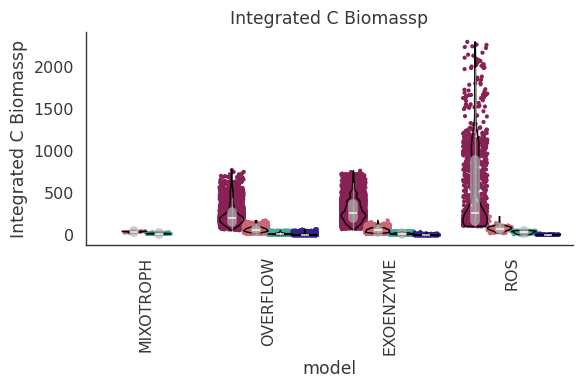

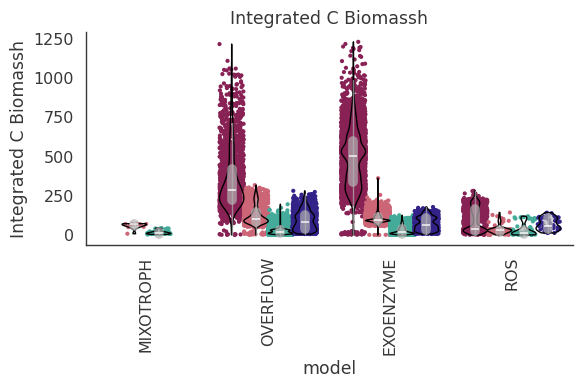

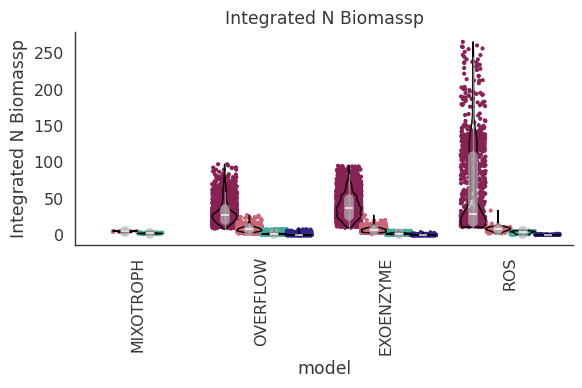

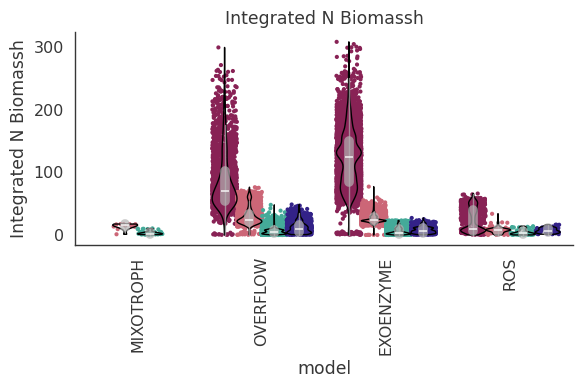

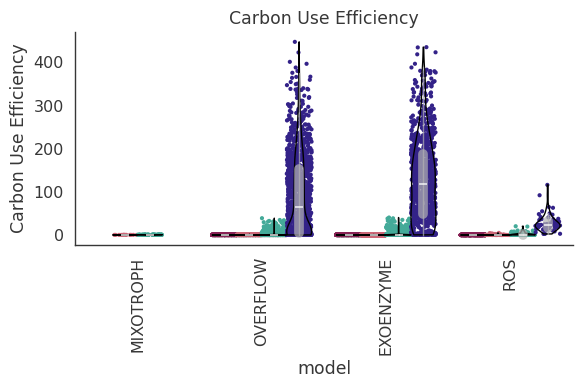

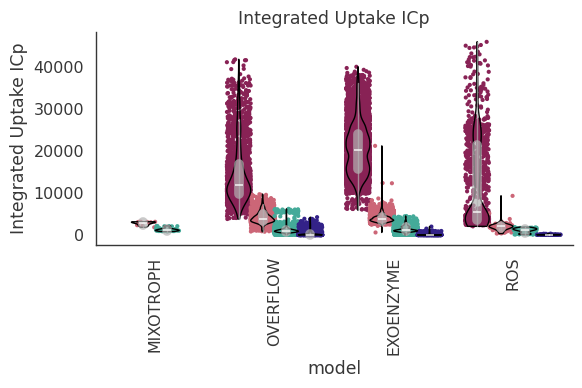

In [79]:
sns.set_context('paper', font_scale=1.3)
for c in pca_data_cols_full:
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=1, 
        height=3,
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
    )
    sns.stripplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        size=3, dodge=True, jitter=0.4, zorder=-100,
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
    
    #g.set(ylabel=stage)
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.xticks(rotation=90)
    plt.title(c)
    plt.show()

In [57]:
pca_data_cols_full
final_figure_cols = ['Final RDOC','N reuse','Carbon Use Efficiency','Final Organic C',]
final_figure_titles = ['Final Recalcitrant DOC','N Reuse','Carbon Use Efficiency','Final Organic C',]
final_figure_ylabel = ['µM C','N Reuse','Carbon Use Efficiency','µM C',]


In [58]:
final_figure_ylim = [(0,1500), (-3,20), (-0.1,1.1), (0,1500)]

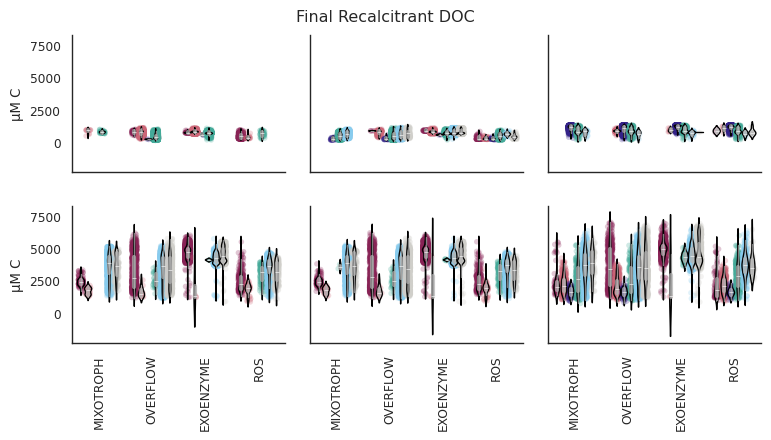

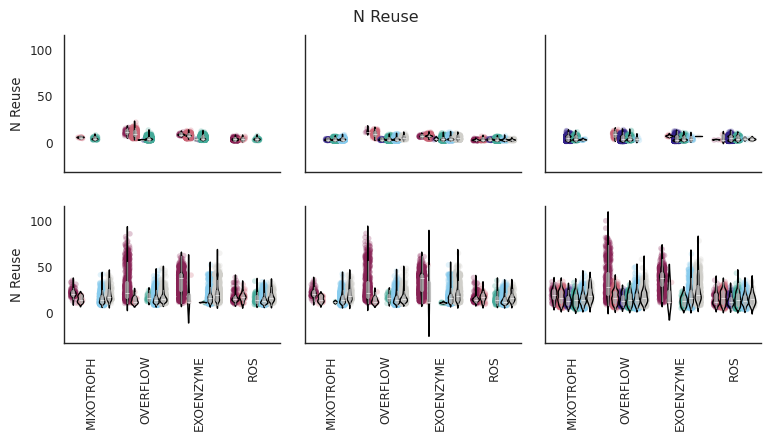

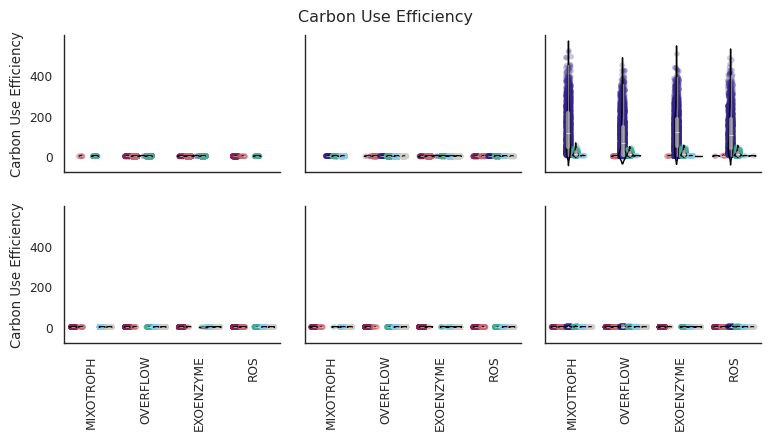

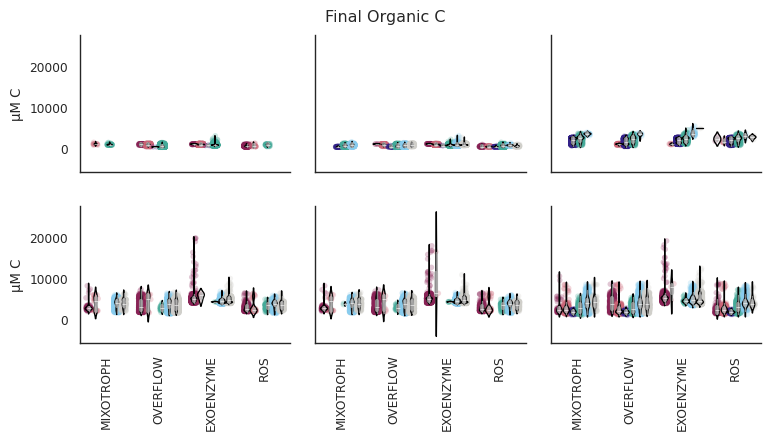

In [182]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder, 
        #palette=gpalette1,
        palette=['black','black','black','black','black', 'black'],
        x='model', order=morder,
        #col='model', col_order=morder, sharex=False,
        col='DOC', row='DIN',
        
        kind='violin', #split=True,
        #kind='box', #split=True,
        aspect=1.3,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=3, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        #flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder, palette=gpalette,
        x='model', order=morder,
        size=4, dodge=True, jitter=0.3, zorder=-100, alpha=0.25,
        legend=False, rasterized=True,
    )
    #if c == 'Final Organic C' or c== 'Final RDOC':
    #    g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', #ylim=ylim,
          xlabel='')
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(title)
    plt.show()
    #save_fpath = os.path.join(save_dpath, f'fig_4_biomass_{title}_box.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)


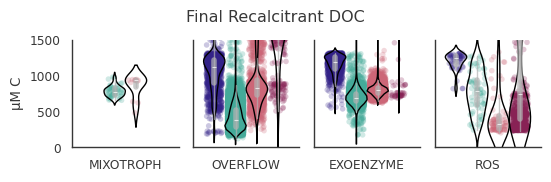

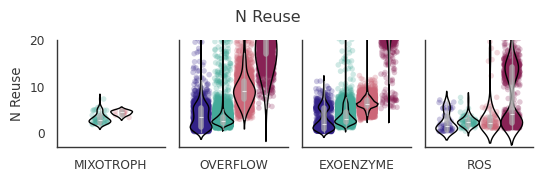

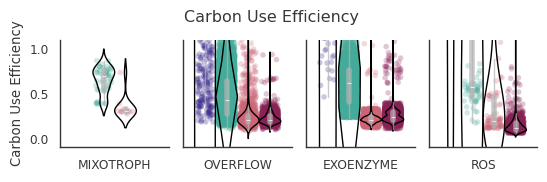

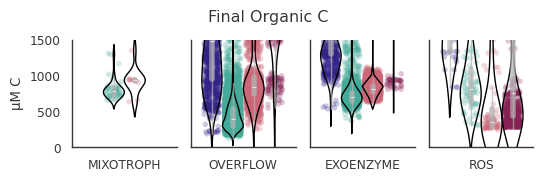

In [60]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=list(reversed(gorder1)), 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.7,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=4, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        #flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=list(reversed(gorder1)), palette=list(reversed(gpalette1)),
        x='model', #order=morder,
        size=4, dodge=True, jitter=0.3, zorder=-100, alpha=0.25,
        #size=1, dodge=True, jitter=0.4, zorder=-100, alpha=0.5,
        legend=False, rasterized=True,
    )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', ylim=ylim,
          xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(title)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_{title}_violin.svg')
    g.savefig(save_fpath)
    

In [61]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

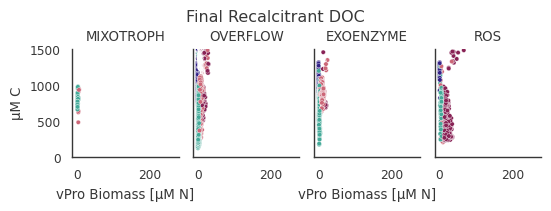

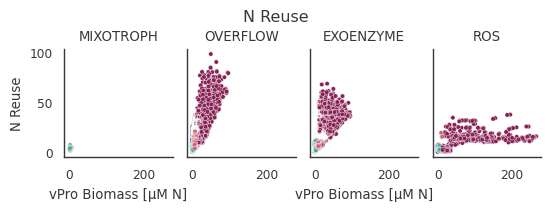

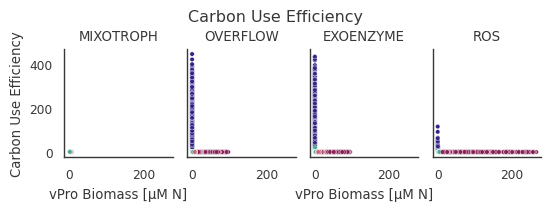

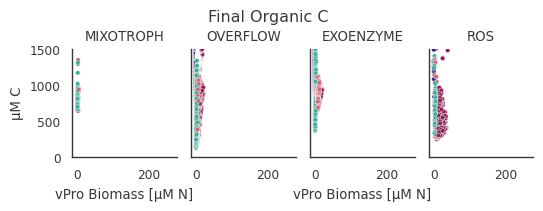

In [62]:
sns.set_context('paper') #, font_scale=1.3)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile],
         y=c, x='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', col_order=morder, s=10, #alpha=0.7,
        legend=False, aspect=0.7, height=2,rasterized=True,
    )
    g.set_titles(col_template='{col_name}')
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(xlabel='vPro Biomass [µM N]', ylabel=ylabel, 
          #xlim=(-1,60), 
          #ylim=ylim, 
         )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    g.axes_dict['OVERFLOW'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(title, y=1.03)
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_pro_vs_{title}.svg')
    g.savefig(save_fpath)


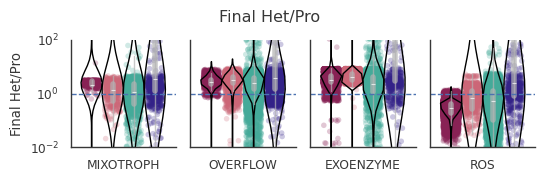

In [63]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(['Final Het/Pro'], ['Final Het/Pro'], ['Final Het/Pro'], [(1e-2,1e2)]):
    g = sns.catplot(
        data=comb_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.7,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=4, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        #flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        size=4, dodge=True, jitter=0.3, zorder=-100, alpha=0.25,
        #size=1, dodge=True, jitter=0.4, zorder=-100, alpha=0.5,
        legend=False, rasterized=True,
    )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', ylim=ylim,
          xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    for c,ax in g.axes_dict.items():
        ax.axhline(1,lw=1, ls='--')
    plt.suptitle(title)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_{title}_violin.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)
    

In [64]:
def get_next_unused_letter(columns):
    """
    Identify the next unused lowercase letter to use for compact lettering.
  
    Parameters:
    columns (list of strs): List of current column groups.

    Returns:
    str or None: Returns the next available lowercase letter, or None if all 26 letters are already used.
    """
    used_letters = set(letter for col in columns for letter in col if letter != '')
    
    # Iterate through the alphabet to find an unused letter.
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        if letter not in used_letters:
            return letter
    
    # Return None if all letters are used (which should only happen with >26 columns).
    return None  

def absorb_columns(columns):
    """
    Absorbs redundant columns by comparing indices.

    Parameters:
    columns (list of strs): List of current column groups.

    Returns:
    list of strs: The processed list of column groups.
    """
    absorbed = True
    while absorbed:
        absorbed = False
        for i, col1 in enumerate(columns):
            for j, col2 in enumerate(columns):
                if i != j:
                    indices1 = {index for index, letter in enumerate(col1) if letter != ''}
                    indices2 = {index for index, letter in enumerate(col2) if letter != ''}
                    if indices1.issubset(indices2):
                        absorbed = True
                        columns.pop(i)
                        break
            if absorbed:
                break
    return columns

def compact_letter_display(significant_pairs, columns):
    """
    Generate compact letter display (CLD) for columns based on significant pairs.
    
    Parameters:
    significant_pairs (list of tuples): Significant pairs identified in a Tukey HSD test.
    columns (list of str): Columns in the DataFrame.

    Returns:
    list of str: The compact letter display representation.
    """
    num_groups = len(columns)

    # Map column names to indices.
    col_to_index = {col: idx for idx, col in enumerate(columns)}

    # Map significant pair names to indices.
    significant_pairs = [(col_to_index[col1], col_to_index[col2]) for col1, col2 in significant_pairs]


    columns = [['a'] * num_groups]
    for pair_idx, (i, j) in enumerate(significant_pairs):
        connected = False
        for idx, column in enumerate(columns):
            # When current pair have the same letter...
            if column[i] == column[j] and column[i] != '':
                connected = True
                new_letter = get_next_unused_letter(columns)
                new_column = column.copy() 
                new_column = [new_letter if column[i] != '' else '' for i in range(num_groups)]
                new_column[i] = ''
                column[j] = ''
                columns[idx] = column
                columns.append(new_column)
                columns = absorb_columns(columns)
            if connected:
                break 

    # Generate compact letter displays from the columns list.
    result = [''.join(columns[k][n] for k in range(len(columns)) if columns[k][n] != '') for n in range(num_groups)]
 
    return result

In [65]:
morder

['MIXOTROPH', 'OVERFLOW', 'EXOENZYME', 'ROS']

In [66]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for c in [ 
    #'Final RDON',
 'Final RDOC',
 #'Final DON',
 #'Final DOC',
 'Final Organic C',
 'N reuse',
 'Carbon Use Efficiency',
]:
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin(morder)].copy()
    colnospace = c.replace(' ', '')
    data[colnospace] = data[c]
    data['model_y_pred'] = data['model'] + ' ' + data['y_pred']
    
    # Conduct one-way ANOVA
    print('####################################################################')
    print (c)
    model = ols(f'{colnospace} ~ C(model_y_pred)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
    print(anova_table)
    # Conduct Tukey's test
    tukey = pairwise_tukeyhsd(endog=data[colnospace], groups=data['model_y_pred'], alpha=0.05)
    groups_for_tucky = [f'{m} {y}' for m in morder for y in gorder1 if f'{m} {y}' in data.model_y_pred.values]
    
    print(tukey)
    print('####################################################################')
    pair_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    significant_pairs = pair_df[pair_df['reject'] == True][['group1', 'group2']].values.tolist()
    #print (list(zip(groups_for_tucky,compact_letter_display(significant_pairs, groups_for_tucky))))
    print (c)
    print (groups_for_tucky)
    print (' '.join(compact_letter_display(significant_pairs, groups_for_tucky)))

    print('####################################################################')
    print('####################################################################')


####################################################################
Final RDOC
                      df        sum_sq       mean_sq             F  PR(>F)
C(model_y_pred)     16.0  8.647723e+10  5.404827e+09  10282.771453     0.0
Residual         42776.0  2.248391e+10  5.256197e+05           NaN     NaN
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1              group2        meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------------------------
EXOENZYME Inhibited   EXOENZYME Neutral  1606.0739    0.0  1511.8885  1700.2593   True
EXOENZYME Inhibited    EXOENZYME Strong  3516.9178    0.0  3429.7252  3604.1103   True
EXOENZYME Inhibited EXOENZYME Sustained  -359.3546    0.0  -445.2388  -273.4703   True
EXOENZYME Inhibited      EXOENZYME Weak  -424.6437    0.0  -514.1433  -335.1442   True
EXOENZYME Inhibited MIXOTROPH Sustained  -315.3149 0.9876 -1043.6128   412.9831  False

KeyError: 'EXOENZYME Neutral'

In [ ]:
groups_for_tucky = [f'{m} {y}' for m in morder for y in gorder1 if f'{m} {y}' in data.model_y_pred.values]
groups_for_tucky

In [ ]:
pair_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
significant_pairs = pair_df[pair_df['reject'] == True][['group1', 'group2']].values.tolist()
significant_pairs
print (list(zip(groups_for_tucky,compact_letter_display(significant_pairs, groups_for_tucky))))


In [ ]:
tukey.reject

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for c in [ 
    'Final RDON',
 'Final RDOC',
 'Final DON',
 #'Final DOC',
 'Final Organic C',
 'N reuse',
 'Carbon Use Efficiency',
]:
    for m in morder:
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin([m])].copy()
        colnospace = c.replace(' ', '')
        data[colnospace] = data[c]
        # Conduct one-way ANOVA
        print('####################################################################')
        print (m, c)
        model = ols(f'{colnospace} ~ C(y_pred)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
        print(anova_table)
        # Conduct Tukey's test
        tukey = pairwise_tukeyhsd(endog=data[colnospace], groups=data['y_pred'], alpha=0.05)
        print(tukey)
    print('####################################################################')
    print('####################################################################')
    print('####################################################################')


In [ ]:
corr_data_cols = [
    
 'Final RDON',
 'Final RDOC',
 'Final DON',
 'Final DOC',
 'N reuse',
 'Final Organic C',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]


In [ ]:
from scipy.stats import pearsonr, spearmanr, false_discovery_control
#corr_toremove = 
def _get_corr_matrix(comb_df, params_to_add, pca_cols, threshold=0.3, params_on_cols=False):
    rho = comb_df[params_to_add + pca_cols].corr(method='spearman')    
    pval = comb_df[params_to_add + pca_cols].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
    #pvaladj = pd.DataFrame(false_discovery_control(pval, axis=None), index=pval.index, columns=pval.columns)
    p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    rho_text = rho.round(1).astype(str) +'\n'+ p    
    rho1 = rho[np.abs(rho[pca_cols]).ge(threshold).sum(axis=1).ge(1)]
    rho2 = rho1[rho1.index]
    if params_on_cols:
        cols = [c for c in rho2.columns if c in params_to_add]
        index_list = [c for c in rho2.columns if c not in  params_to_add]
        rho2 = rho2.reindex(columns=cols, index=index_list)
    rho_text = rho_text.reindex(columns=rho2.columns, index=rho2.index)
        
    return (rho2, rho_text)

In [ ]:

for m in morder:
    data, annot = _get_corr_matrix(core_df.loc[core_df.model.isin([m])], [], corr_data_cols, threshold=0, params_on_cols=False)
    
    sns.clustermap(
        data,
        cmap='coolwarm', vmax=1, vmin=-1, #row_cluster=False, col_cluster=False,
        annot=annot, fmt="s", figsize=(7,7),
        cbar_pos=None,
                  )
    plt.suptitle(m)

In [ ]:
plt.rcParams

In [191]:
comb_df.columns.values

array(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred',
       'Sample', 'max_prob', 'Final Bp', 'Final Np', 'Final Cp',
       'Final Bh', 'Final Nh', 'Final Ch', 'Final DON', 'Final RDON',
       'Final DIN', 'Final DOC', 'Final RDOC', 'Final DIC', 'Final ROS',
       't', 'day', 'Final Uptake INp', 'Final Uptake INh',
       'Final Uptake ONp', 'Final Uptake ONh', 'Final Uptake ICp',
       'Final Uptake ICh', 'Final Uptake OCp', 'Final Uptake OCh',
       'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh',
       'biosynthesisNp', 'biosynthesisNh', 'Final respirationCp',
       'Final respirationCh', 'biomass_breakdownCp',
       'biomass_breakdownCh', 'Final overflowNp', 'Final overflowNh',
       'Final overflowCp', 'Final overflowCh', 'Final ROSproductionp',
       'Final ROSproductionh', 'Final ROSlossp', 'Final ROSlossh',
       'deathbiomassNp', 'deathbiomassNh', 'deathstoreNp', 'deathstoreNh',
       'deathstoreCp', 'deathstoreCh', 'DON2DIN_exop',
       